In [85]:
import pandas as pd
import sklearn
import numpy as np

credit=pd.read_csv("Credit.csv")
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [86]:
#We don't need the ID column,so lets drop it.
credit = credit.drop(["ID"],axis=1)

In [87]:
#changing the name of  pay_0 column to pay_1 to make the numbering correct

In [88]:
credit.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [89]:
credit.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [90]:
#Removing Unwanted categorical levels as mentioned in data exploration
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [91]:
#Changing Education levels 0,5,6 to others(4)
credit["EDUCATION"]=credit["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [92]:
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [93]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [94]:
#similarly chaning marriage level 0 to level 3
credit["MARRIAGE"]=credit["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [95]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [96]:
#lets check which features are important
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X = credit.drop('default.payment.next.month',axis=1)
Y = credit['default.payment.next.month']
clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
clf.feature_importances_

array([ 0.06673129,  0.01107916,  0.03071698,  0.01828816,  0.06729232,
        0.10502206,  0.04590552,  0.03639505,  0.02706571,  0.02889421,
        0.02720425,  0.05080295,  0.04753515,  0.04445718,  0.04384626,
        0.04408402,  0.04320006,  0.04511946,  0.042764  ,  0.04264839,
        0.04227342,  0.04214917,  0.04652524])

In [97]:
#Feature Scaling

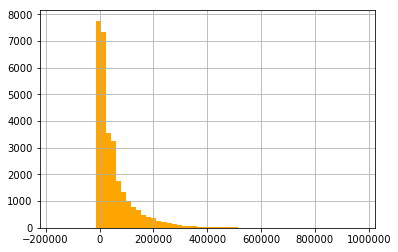

In [98]:
%matplotlib inline
#feature scaling check
credit['BILL_AMT1'].hist(bins=60, color='orange')

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(credit)

array([[ 0.01010101,  1.        ,  0.33333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.11111111,  1.        ,  0.33333333, ...,  0.        ,
         0.00378311,  1.        ],
       [ 0.08080808,  1.        ,  0.33333333, ...,  0.00234451,
         0.00945777,  0.        ],
       ..., 
       [ 0.02020202,  0.        ,  0.33333333, ...,  0.00468901,
         0.00586382,  1.        ],
       [ 0.07070707,  0.        ,  0.66666667, ...,  0.12417444,
         0.00341236,  1.        ],
       [ 0.04040404,  0.        ,  0.33333333, ...,  0.00234451,
         0.00189155,  1.        ]])

In [100]:
#check for null values
credit.apply(lambda x: sum(x.isnull()),axis=0) 

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [101]:
#Initial Model training(except feed forward neural network)
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit, test_size = 0.3)

X_train = train.drop('default.payment.next.month',axis=1)

y_train = train['default.payment.next.month']

X_test =  test.drop('default.payment.next.month',axis=1)

y_test = test['default.payment.next.month']

In [102]:
#Train benchmark model(Log Regression)
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression(random_state=10)
clf0.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 0.777
Precision: 0.603729
Recall: 0.777
f1_score: 0.679492402926


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
#Train other classifiers
#We start with randomforest
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(random_state=10)
clf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [105]:
y_pred1 = clf1.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred1)
precision_rf=precision_score(y_test, y_pred1,average='weighted')
recall_rf=recall_score(y_test, y_pred1,average='weighted')
f1_rf=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)

accuracy: 0.807222222222
Precision: 0.785871777618
Recall: 0.807222222222
f1_score: 0.783502576417


In [106]:
#gradeint boost
from sklearn.ensemble import GradientBoostingClassifier
clf2=GradientBoostingClassifier(random_state=10)
clf2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [107]:
y_pred2 = clf2.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)

accuracy: 0.821444444444
Precision: 0.805451059511
Recall: 0.821444444444
f1_score: 0.800503291948


In [108]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(random_state=10)
clf3.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=10)

In [109]:
y_pred3 = clf3.predict(X_test)
accuracy_ab=accuracy_score(y_test, y_pred3)
precision_ab=precision_score(y_test, y_pred3,average='weighted')
recall_ab=recall_score(y_test, y_pred3,average='weighted')
f1_ab=f1_score(y_test,y_pred3,average='weighted')
print("accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print('f1_score:',f1_ab)

accuracy: 0.818555555556
Precision: 0.802242885074
Recall: 0.818555555556
f1_score: 0.793428250173


In [110]:
#voting classifier
from sklearn.ensemble import VotingClassifier
clf4 = VotingClassifier(estimators=[('rf',clf1),('gb', clf2),('ab',clf3)])
clf4.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...thm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=10))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [111]:
y_pred4 = clf4.predict(X_test)
accuracy_vc=accuracy_score(y_test, y_pred4)
precision_vc=precision_score(y_test, y_pred4,average='weighted')
recall_vc=recall_score(y_test, y_pred4,average='weighted')
f1_vc=f1_score(y_test,y_pred4,average='weighted')
print("accuracy:", accuracy_vc)
print("Precision:", precision_vc)
print("Recall:", recall_vc)
print('f1_score:',f1_vc)

accuracy: 0.819777777778
Precision: 0.803495820308
Recall: 0.819777777778
f1_score: 0.79663926916


In [112]:
#appending all socres
arraycuracy=[]
arraycuracy.append(accuracy_regr)
arraycuracy.append(accuracy_rf)
arraycuracy.append(accuracy_gb)
arraycuracy.append(accuracy_ab)
arraycuracy.append(accuracy_vc)

In [113]:
precisionray=[]
precisionray.append(precision_regr)
precisionray.append(precision_rf)
precisionray.append(precision_gb)
precisionray.append(precision_ab)
precisionray.append(precision_vc)

In [114]:
recallray=[]
recallray.append(recall_regr)
recallray.append(recall_rf)
recallray.append(recall_gb)
recallray.append(recall_ab)
recallray.append(recall_vc)

In [115]:
f1ray=[]
f1ray.append(f1_regr)
f1ray.append(f1_rf)
f1ray.append(f1_gb)
f1ray.append(f1_ab)
f1ray.append(f1_vc)

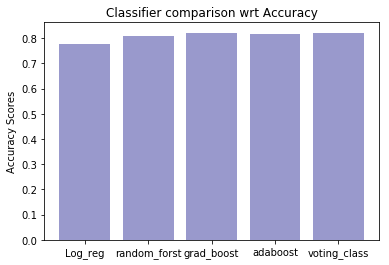

In [116]:
#Lets compare Accuracy,precison,racall
import matplotlib.pyplot as plt
classifier_names=('Log_reg','random_forst','grad_boost','adaboost','voting_class')
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis, arraycuracy, alpha=0.4,color='navy',ecolor='navy')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

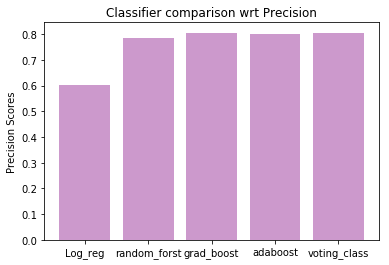

In [117]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,precisionray, alpha=0.4,color='purple',ecolor='darkgreen')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Precision Scores')
plt.title('Classifier comparison wrt Precision')
plt.show()

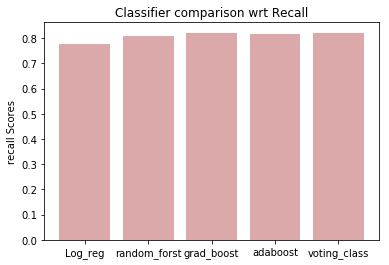

In [118]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,recallray, alpha=0.4,color='brown',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('recall Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()

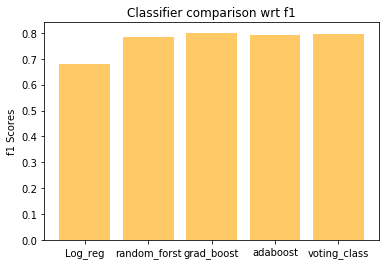

In [119]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,f1ray, alpha=0.6,color='orange',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('f1 Scores')
plt.title('Classifier comparison wrt f1')
plt.show()

In [120]:
#Some fine REFINEMENTS to GBboost,Rfforest,and Adaboost
#PERFROM GRIDSEARCH CV on RF,GB and Adaboost to find best parameter values on 10 fold cross validation set
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


parameters_ada ={'n_estimators' :[15,25,50],
            }



clf = GridSearchCV(AdaBoostClassifier(random_state=10), parameters_ada,cv=10,scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters for Adaboost:",clf.best_params_)

Best parameters for Adaboost: {'n_estimators': 15}


In [121]:
parameters_boost ={'n_estimators' :[15,25,50],
             'min_samples_split' :[3,10,15]
}

clf00 = GridSearchCV(GradientBoostingClassifier(random_state=10), cv=10, param_grid=parameters_boost, scoring='accuracy')
clf00.fit(X_train,y_train)
print("Best parameters for GradeintBoosting:",clf00.best_params_)


clf001 = GridSearchCV(RandomForestClassifier(random_state=10), cv=10, param_grid=parameters_boost,scoring='accuracy')
clf001.fit(X_train,y_train)
print("Best parameters for RandomForest:",clf001.best_params_)

Best parameters for GradeintBoosting: {'min_samples_split': 15, 'n_estimators': 50}
Best parameters for RandomForest: {'min_samples_split': 15, 'n_estimators': 50}


In [195]:
#Use the above parameter values for our Weighted voting CLassifier

#First we have to calibrate our classsifers

#Isotonic claibration
from sklearn.calibration import CalibratedClassifierCV
clfvc1 = RandomForestClassifier(n_estimators=50,min_samples_split=15,random_state=10)
clfvc2=AdaBoostClassifier(n_estimators=15,random_state=10)
clfvc3=GradientBoostingClassifier(n_estimators=50,min_samples_split=15,random_state=10)
clf_isotonic1 = CalibratedClassifierCV(clfvc1, method='isotonic',cv=10)
clf_isotonic2 = CalibratedClassifierCV(clfvc2, method='isotonic',cv=10)
clf_isotonic3 = CalibratedClassifierCV(clfvc3, method='isotonic',cv=10)

In [185]:
#Inputing the istonic calibration to voting classifier with weights.
import time
t0 = time.clock()
clfvc = VotingClassifier(estimators=[('rf',clf_isotonic1),('ab', clf_isotonic2),('gb',clf_isotonic3)],voting='soft',weights=[1,1,2])
clfvc.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, m..., subsample=1.0, verbose=0,
              warm_start=False),
            cv=10, method='isotonic'))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 1, 1])

In [186]:
y_predvc = clfvc.predict(X_test)
accuracy_vciso=accuracy_score(y_test, y_predvc)

In [187]:
precision_vciso=precision_score(y_test, y_predvc)

In [188]:
#Results of weighted voting classifer
y_predvc = clfvc.predict(X_test)
accuracy_vciso=accuracy_score(y_test, y_predvc)
precision_vciso=precision_score(y_test, y_predvc,average='weighted')
recall_vciso=recall_score(y_test, y_predvc,average='weighted')
f1_vciso=f1_score(y_test,y_predvc,average='weighted')
print("accuracy:", accuracy_vciso)
print("Precision:", precision_vciso)
print("Recall:", recall_vciso)
print('f1_score:',f1_vciso)
print('Training_time:',time.clock() - t0)

accuracy: 0.821666666667
Precision: 0.805790548828
Recall: 0.821666666667
f1_score: 0.800497169577
Training_time: 59.46775733333334


In [193]:
#Training just the Gradient Boost(clfvc3) with tuned parameters from above
t1 = time.clock()
clfvc3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=15,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [194]:
#results of Tuned Gradient Boosting classifer
y_predgb2 = clfvc3.predict(X_test)
accuracy_gb2=accuracy_score(y_test, y_predgb2)
precision_gb2=precision_score(y_test, y_predgb2,average='weighted')
recall_gb2=recall_score(y_test, y_predgb2,average='weighted')
f1_gb2=f1_score(y_test,y_predgb2,average='weighted')
print("accuracy:", accuracy_gb2)
print("Precision:", precision_gb2)
print("Recall:", recall_gb2)
print('f1_score:',f1_gb2)
print('Training_time:',time.clock() - t1)

accuracy: 0.822888888889
Precision: 0.807469736307
Recall: 0.822888888889
f1_score: 0.801832784112
Training_time: 1.9779253333335873


In [196]:
#FINAL EVALUATION USING Stratified 10-fold CV on VC
from sklearn.model_selection import cross_val_score
#accuracy
scores = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10)
scores.mean()

0.82220287299291184

In [197]:
from sklearn.model_selection import cross_val_score
#f1
scores1 = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='f1_weighted')
scores1.mean()

0.80021882447113324

In [198]:
#Precision
scores2 = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='precision_weighted')
scores2.mean()

0.80645997468495467

In [199]:
#Recall
scores3 = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='recall_weighted')
scores3.mean()

0.82220287299291184

In [200]:
#corss validated final results of tuned Gradient Boosting
print("Accuracy:",scores.mean())
print("Precision:",scores2.mean())
print("Recall:",scores3.mean())
print("F1:",scores1.mean())

Accuracy: 0.822202872993
Precision: 0.806459974685
Recall: 0.822202872993
F1: 0.800218824471


In [260]:
#lets crossvalidate log regression 
#f1
import warnings
warnings.filterwarnings("ignore")
scores4 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='f1_weighted')
scores4.mean()

0.68193712829259523

In [261]:
#accuracy
scores5 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10)
scores5.mean()

0.77876670255926317

In [262]:
#precision 
scores6 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='precision_weighted')
scores6.mean()

0.60652374650316576

In [263]:
#Recall
scores7 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='recall_weighted')
scores7.mean()

0.77876670255926317

In [264]:
print("Accuracy:",scores5.mean())
print("Precision:",scores6.mean())
print("Recall:",scores7.mean())
print("F1:",scores4.mean())

Accuracy: 0.778766702559
Precision: 0.606523746503
Recall: 0.778766702559
F1: 0.681937128293


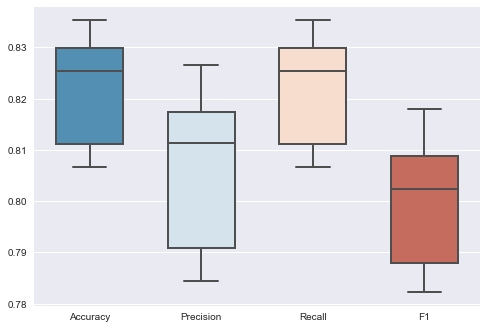

In [254]:
#Free form visualization of all metrics of Gradient boosting(final model) and Log_regression(benchmark model)
import seaborn as sns
all_scores=[]
all_scores.append(scores)
all_scores.append(scores2)
all_scores.append(scores3)
all_scores.append(scores1)
eval1=[]
eval1.append('Accuracy')
eval1.append('Precision')
eval1.append('Recall')
eval1.append('F1')
ax=sns.boxplot(y=all_scores,x=eval1,palette=("RdBu_r"),linewidth=2.0,width=0.6)
#ax.set(ylim=(0.76, 0.82))